In [1]:
import matplotlib.pyplot as plt
import numpy as np
from threshold import * 
from calibration import calibrate
from transform import *
from lane_detection import * 
import cv2
import glob
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
mtx, dist = calibrate()
ksize = 3

In [3]:
def process_image(image):
    # distortion correction
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    # gradient thresholding
    gradx = abs_sobel_thresh(undist, orient='x', sobel_kernel=ksize, thresh=(20, 255))
    # color thresholding
    ls_binary = ls_thresh(undist, thresh=[120, 50])
    # combine thresholds
    combined = combine_two_thresholds(gradx, ls_binary)
    # perspective transform 
    M, warped, Minv =  warp_image(combined)
    # detect lane lines
    left_fitx, right_fitx, ploty, curv_left, curv_right, dist_from_center = detect_lane(warped)
    # project detected lane line on undistorted source image
    final = draw_lane(undist, warped, Minv, left_fitx, right_fitx, ploty, curv_left, curv_right, dist_from_center)
    return final

In [4]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import moviepy as mve

[MoviePy] >>>> Building video output_video.mp4
[MoviePy] Writing video output_video.mp4


100%|█████████▉| 1260/1261 [04:51<00:00,  4.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video.mp4 



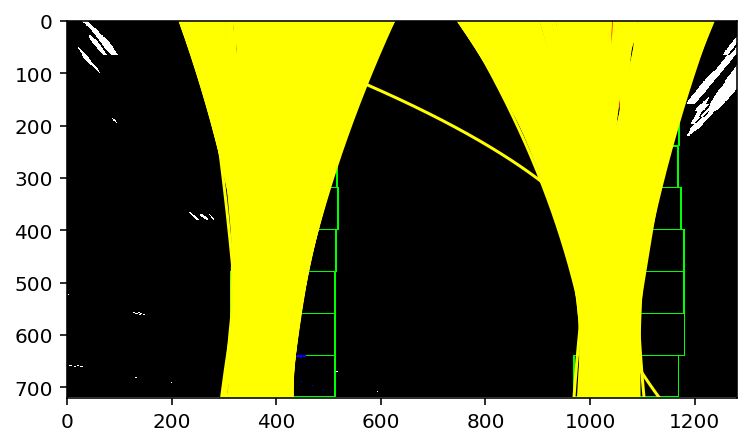

In [6]:
#Create video file pipeline
output = 'output_video.mp4'
clip1 = VideoFileClip('project_video.mp4')

out_clip = clip1.fl_image(process_image)
out_clip.write_videofile(output, audio=False)